# Problemas de prueba de hipótesis

## Ejercicio 1

Usted es un nutricionista que investiga dos tipos diferentes de dietas para ver si existe una diferencia significativa en la pérdida de peso después de un mes. Eliges dos grupos aleatorios de personas; un grupo sigue la primera dieta y el otro sigue la segunda. Al final del mes, se registra la pérdida de peso (en kg) de cada persona:

| Diet 1 | Diet 2 |
|:-------|:-------|
| 2.0 | 3.0 |
| 2.5 | 3.2 |
| 3.0 | 3.1 |
| 2.8 | 2.9 |
| 2.3 | 2.8 |
| 2.7 | 3.0 |
| 2.5 | 3.2 |

Con estos datos se busca responder a la siguiente pregunta: ¿Existe una diferencia significativa en la pérdida de peso promedio entre las personas que siguieron la primera dieta y las que siguieron la segunda dieta?

Para sacar conclusiones, siga los siguientes puntos:

-Enunciar la hipótesis: hipótesis nula y alternativa.
-Realizar la prueba para comprobar la hipótesis. Puede utilizar la prueba t de Student.
-Analizar las conclusiones.

In [1]:
import pandas as pd

# Listas de pérdida de peso
dieta1 = [2.0, 2.5, 3.0, 2.8, 2.3, 2.7, 2.5]
dieta2 = [3.0, 3.2, 3.1, 2.9, 2.8, 3.0, 3.2]

# Crear un DataFrame
df = pd.DataFrame({
    'Dieta 1': dieta1,
    'Dieta 2': dieta2
})

# Mostrar el DataFrame
print(df)


   Dieta 1  Dieta 2
0      2.0      3.0
1      2.5      3.2
2      3.0      3.1
3      2.8      2.9
4      2.3      2.8
5      2.7      3.0
6      2.5      3.2


### H0 = No hay gran diferencia en la pérdida de peso promedio entre los dos grupos

### H1 = Hay una gran diferencia en la pérdida de peso promedio entre los dos grupos

### Realizar la prueba para comprobar la hipótesis. Puede utilizar la prueba t de Student.

In [2]:
from scipy.stats import ttest_ind
# Prueba t
t_stat, p_value = ttest_ind(dieta1, dieta2)

print("Valor t, desviaciones estandar",{t_stat}, "y p valor es ", {p_value})
# t_stat, p_value

Valor t, desviaciones estandar {np.float64(-3.5383407969933938)} y p valor es  {np.float64(0.004083270191713912)}


### Analizar las conclusiones.

In [ ]:
print("Promedio Dieta 1:", df['Dieta 1'].mean())
print("Promedio Dieta 2:", df['Dieta 2'].mean())

# Promedio Dieta 1: 2.542857142857143
# Promedio Dieta 2: 3.0285714285714285

Promedio Dieta 1: 2.542857142857143
Promedio Dieta 2: 3.0285714285714285


Si p < α → Rechazo H₀ → Hay evidencia a favor de H₁ (la alternativa).

Si p > α → NO rechazo H₀ → No hay evidencia suficiente para aceptar H₁.

Para un nivel de significancia a = 0.05

0.00408 < 0.05

Se rechaza la hipotesis nula y se deja la alternativa que nos dice que si hay una diferencia significativa en la pérdida de peso promedio entre las personas que siguieron la primera dieta y las que siguieron la segunda dieta, la dieta dos genera mayor pérdida de peso en promedio a la dieta 1.

/tmp/ipykernel_3381/107071222.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dieta', y='Pérdida de peso (kg)', data=df, palette="pastel")


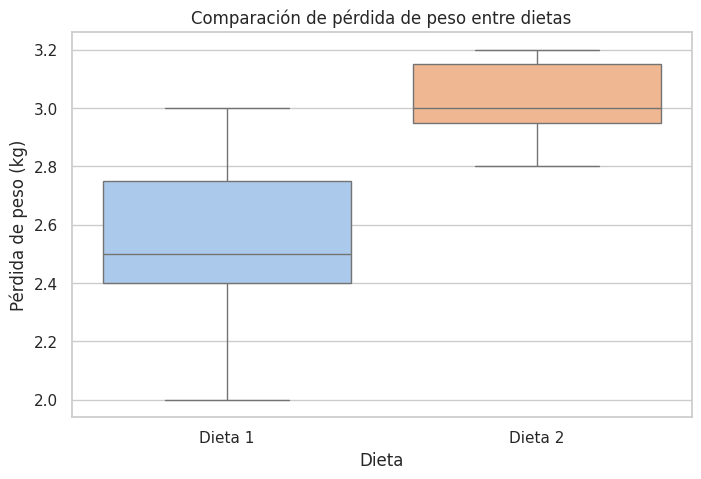

/tmp/ipykernel_3381/107071222.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Dieta', y='Pérdida de peso (kg)', data=df, ci="sd", palette="Set2")
/tmp/ipykernel_3381/107071222.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dieta', y='Pérdida de peso (kg)', data=df, ci="sd", palette="Set2")


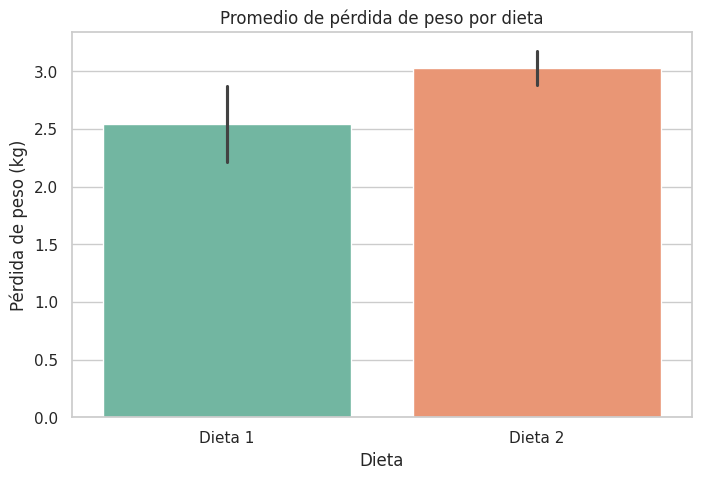

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datos
dieta1 = [2.0, 2.5, 3.0, 2.8, 2.3, 2.7, 2.5]
dieta2 = [3.0, 3.2, 3.1, 2.9, 2.8, 3.0, 3.2]

# Crear DataFrame en formato largo
df = pd.DataFrame({
    'Pérdida de peso (kg)': dieta1 + dieta2,
    'Dieta': ['Dieta 1'] * len(dieta1) + ['Dieta 2'] * len(dieta2)
})

# Configuración de estilo
sns.set(style="whitegrid")

# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='Dieta', y='Pérdida de peso (kg)', data=df, palette="pastel")
plt.title('Comparación de pérdida de peso entre dietas')
plt.show()

# Gráfico de barras con promedios
plt.figure(figsize=(8, 5))
sns.barplot(x='Dieta', y='Pérdida de peso (kg)', data=df, ci="sd", palette="Set2")
plt.title('Promedio de pérdida de peso por dieta')
plt.show()


## ANOVA

**ANOVA** (*Analysis of Variance - Análisis de variación*) Es una técnica estadística utilizada para comparar las medidas de dos o más grupos. La idea detrás de ANOVA es descomponer la variabilidad total de los datos en dos componentes: variabilidad entre grupos y variabilidad dentro de los grupos:

- **Variabilidad entre grupos**: Esta variabilidad se refiere a las diferencias entre las medias del grupo. Si esta variabilidad es considerablemente mayor que la variabilidad dentro del grupo, podría ser una indicación de que al menos una de las medias del grupo es diferente.
- **Variabilidad dentro del grupo**: Esta variabilidad se refiere a la dispersión de los datos dentro de cada grupo. Si todos los grupos tienen una variabilidad similar, entonces cualquier diferencia notable en las medias de los grupos podría considerarse significativa.

Las hipótesis en ANOVA suelen incluir:

- **Hipótesis nula** ($H₀$): Las medias de todos los grupos son iguales.
- **Hipótesis alternativa** ($H₁$): Al menos una de las medias del grupo es diferente.

Si el resultado de la prueba ANOVA es significativo (por ejemplo, un valor p inferior a un umbral como 0,05), esto sugiere que al menos la media de un grupo es diferente.

## Ejercicio 2

Un agricultor decide probar tres tipos diferentes de fertilizantes para determinar si alguno es superior en términos de producción de maíz. El agricultor planta maíz en 15 parcelas idénticas y utiliza los tres fertilizantes (5 parcelas para cada tipo). Al final de la temporada mide el rendimiento de maíz (en kg) de cada parcela, con el siguiente resultado:

| Fertilizante 1 | Fertilizante 2 | Fertilizante 3 |
|:-------------|:-------------|:-------------|
| 20 | 22 | 24 |
| 21 | 21 | 23 |
| 20 | 23 | 22 |
| 19 | 22 | 23 |
| 20 | 21 | 24 |

Con estos datos busca responder la siguiente pregunta: ¿Existe una diferencia significativa en el rendimiento promedio del maíz entre los tres tipos de fertilizantes?

Para ayudarte, sigue los siguientes puntos:

-Enunciar la hipótesis: hipótesis nula y alternativa.
-Realizar la prueba ANOVA.
-Analizar las conclusiones.
-Si un fertilizante es mejor que otro, ¿cómo podemos saberlo?

### Enunciar la hipótesis: hipótesis nula y alternativa.

H0= Los promedios de los rendimientos de los 3 fertilizantes son iguales, no hay diferencias significativas entre los fertilizantes.

H1= Los promedios de los rendimientos de los 3 fertilizantes no son iguales, existen diferencias significativas.

In [11]:
import numpy as np
import scipy.stats as stats

# Datos
fertilizante_1 = [20, 21, 20, 19, 20]
fertilizante_2 = [22, 21, 23, 22, 21]
fertilizante_3 = [24, 23, 22, 23, 24]

# Realizar la prueba ANOVA
f_statistic, p_value = stats.f_oneway(fertilizante_1, fertilizante_2, fertilizante_3)

# Mostrar resultados
print("Estadístico F:", f_statistic)
print("Valor p:", p_value)

# Conclusiones
if p_value < 0.05:
    print("Rechazamos H₀: Al menos un fertilizante tiene un rendimiento significativamente diferente.")
else:
    print("No rechazamos H₀: No hay diferencias significativas entre los fertilizantes.")


# Estadístico F: 20.315789473684188
# Valor p: 0.00014047824793190472
# Rechazamos H₀: Al menos un fertilizante tiene un rendimiento significativamente diferente.

Estadístico F: 20.315789473684188
Valor p: 0.00014047824793190472
Rechazamos H₀: Al menos un fertilizante tiene un rendimiento significativamente diferente.


In [12]:
# Calcular las medias
media_fertil_1 = np.mean(fertilizante_1)
media_fertil_2 = np.mean(fertilizante_2)
media_fertil_3 = np.mean(fertilizante_3)


# Mostrar las medias
print("Media Fertilizante 1:", media_fertil_1)
print("Media Fertilizante 2:", media_fertil_2)
print("Media Fertilizante 3:", media_fertil_3)

# Media Fertilizante 1: 20.0
# Media Fertilizante 2: 21.8
# Media Fertilizante 3: 23.2

Media Fertilizante 1: 20.0
Media Fertilizante 2: 21.8
Media Fertilizante 3: 23.2


In [13]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [14]:
# Crear un DataFrame con los datos
rendimiento = fertilizante_1 + fertilizante_2 + fertilizante_3
fertilizante = ['Fertilizante 1'] * len(fertilizante_1) + ['Fertilizante 2'] * len(fertilizante_2) + ['Fertilizante 3'] * len(fertilizante_3)

df = pd.DataFrame({'Fertilzante': fertilizante, 'Rendimiento': rendimiento})

# Realizar la prueba de Tukey HSD
tukey_result = pairwise_tukeyhsd(df['Rendimiento'], df['Fertilzante'], alpha=0.05)

# Mostrar los resultados
print(tukey_result)


#        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
# ==================================================================
#     group1         group2     meandiff p-adj  lower  upper  reject
# ------------------------------------------------------------------
# Fertilizante 1 Fertilizante 2      1.8 0.0099 0.4572 3.1428   True
# Fertilizante 1 Fertilizante 3      3.2 0.0001 1.8572 4.5428   True
# Fertilizante 2 Fertilizante 3      1.4 0.0409 0.0572 2.7428   True

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1         group2     meandiff p-adj  lower  upper  reject
------------------------------------------------------------------
Fertilizante 1 Fertilizante 2      1.8 0.0099 0.4572 3.1428   True
Fertilizante 1 Fertilizante 3      3.2 0.0001 1.8572 4.5428   True
Fertilizante 2 Fertilizante 3      1.4 0.0409 0.0572 2.7428   True
------------------------------------------------------------------


Si el valor de p-adj es menor que 0.05, significa que hay una diferencia significativa entre los dos grupos de fertilizantes comparados.

La diferencia promedio entre el fertilizante 1 y 2 es de 1.8 kg, por tanto el fertilizante 2 es mejor
que el fertilizante 1 por 1.8 kg


La diferencia promedio entre el fertilizante 1 y 3 es de 3.2 kg, por tanto el fertilizante 3 es mejor que el 1 por 3.2 kg


La diferencia promedio entre el fertilizante 2 y 3 es de 1.4 kg por tanto el fertilizante 3 es mejor que el 2 por 1.4 kg

El fertilizante 1 es el mas malo y el fertilizante 3 es el mejor de todos






El fertilizante 3 es el que mejor rendimiento promedio tiene tiene la mayor diferencia 

Y según las pruebas de hipotesis planteadas:

H0= Los promedios de los rendimientos de los 3 fertilizantes son iguales, no hay diferencias significativas entre los fertilizantes.

H1= Los promedios de los rendimientos de los 3 fertilizantes no son iguales, existen diferencias significativas.

Se rechaza la hipotesis nula (H0) ya    que el valor p-valor del test de anova es <0.05 y se acepta la hipotesis alternativa